# Ejemplos de Modelos NO-Supervisados

# Cambios de Escala

A continuación se procede a cargar el conjunto de datos "breast_cancer", se parte el conjunto en "train" / "test" y se procede a validar el tamaño de cada subgrupo:

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


Se invoca a la función de cambio de escala "MinMaxScaler":

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Se hace el **fit** del **scaler** creado, ***OJO:*** Ese **scaler** es el que utilizamos tanto para el conjunto de **train** como para el conjunto de **test**!!!

In [3]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

Se procede con el cambio de escala para el set de ***train***, al nuevo set le llamaremos ***X_train_scaled***, se verifican máximos y mínimos para el set sin escalar como para el set escalado:

In [4]:
# tranformacion de datos
X_train_scaled = scaler.transform(X_train)

# print de las propiedades del dataset antes y despues del cambio en escala
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
per-feature maximum before scaling:
 [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+0

Se hace lo mismo para el set de ***test***:

In [5]:
# transformacion del test data
X_test_scaled = scaler.transform(X_test)

# print de las propiedades del test data despues del cambio en escala
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[ 0.9578778   0.81501522  0.95577362  0.89353128  0.81132075  1.21958701
  0.87956888  0.9333996   0.93232323  1.0371347   0.42669616  0.49765736
  0.44117231  0.28371044  0.48703131  0.73863671  0.76717172  0.62928585
  1.33685792  0.39057253  0.89612238  0.79317697  0.84859804  0.74488793
  0.9154725   1.13188961  1.07008547  0.92371134  1.20532319  1.63068851]


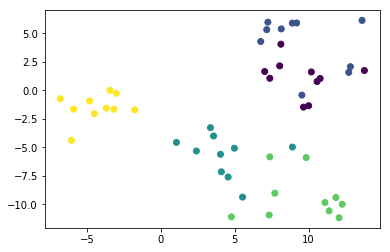

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

# creacion de datos sinteticos
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# split del set en training y test
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# Cambio de escala usando MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.scatter(X[:, 0], X[:, 1], c=_)

Se aplica el clasificador SVM a los datos sin escalar:

In [7]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


Se aplica el clasificador SVM a los datos escalados:

In [8]:
# preprocesado usando cambio en escala 0-1 
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# aprendizaje usando SVM en los datos de training a escala
svm.fit(X_train_scaled, y_train)

# scoring en el conjunto de datos de test escalado
print("Scaled test set accuracy: {:.2f}".format(
svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


# Alguna mejora?

Nótese como el desempeño mejora de un 63% a un 97%, sólo por hacer un cambio en la escala.

Ahora hacemos lo mismo pero con el **StandardScaler**: (Recuerda la diferencia entre el **StandardScaler** y el **MaxMinScaler**????)

In [9]:
# preprocesado usando cambio de escala "zero mean" y "unit variance"
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# aprendizaje usando SVM en los datos de training a escala
svm.fit(X_train_scaled, y_train)

# scoring en el conjunto de datos de test escalado
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


Igualmente se nota con el uso del **StandardScaler** una mejora de 63% a 96%:

# PCA como método de visualización de datos 

Exploremos ahora el uso de PCA para ver mejor los datos, en este caso aplicado al conjunto de datos **breast_cancer** y usando un cambio en la escala con **StandardScaler**:

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [11]:
from sklearn.decomposition import PCA

# Se mantienen los dos primeros componentes principales de los datos
pca = PCA(n_components=2)

# Se hace el fit del PCA model al conjunto de datos "breast cancer"
pca.fit(X_scaled)

# Se transforman los datos en los dos primeros componentes principales (PC)
X_pca = pca.transform(X_scaled)

# Se verifican tamaños
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


Original shape: (569, 30)
Reduced shape: (569, 2)


Se grafica la dispersión de los primeros dos componentes principales:

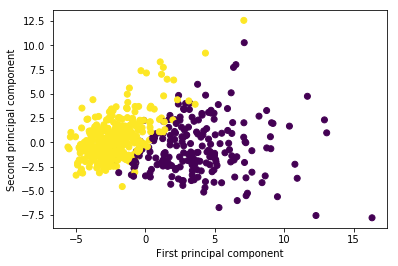

In [12]:
# se hace el plot de la distribución de los dos primeros componentes principales

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Se validan los tamaños y el valor de los componentes:

In [13]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [14]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Se visualizan los PC's (componentes principales):

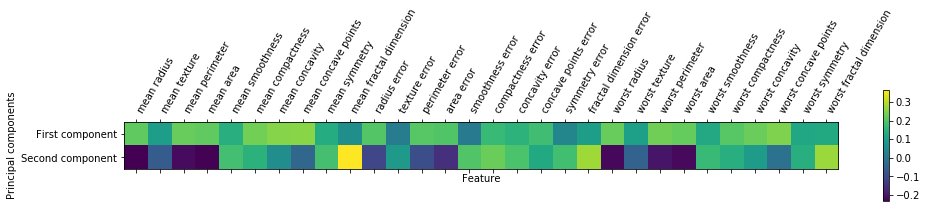

In [15]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

# kMeans

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generación de datos sinteticos en 2D
X, y = make_blobs(random_state=1)

# Se construye el modelo de agrupamiento
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [18]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


Se muestra el resultado de kMeans al set generado, como se observa los resultados fueron buenos:

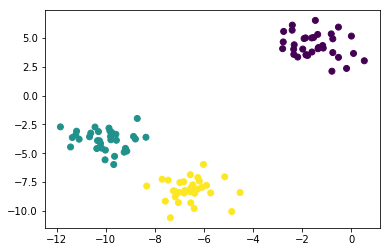

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Como opera kMeans para distribuciones de datos complejas? Veamos...

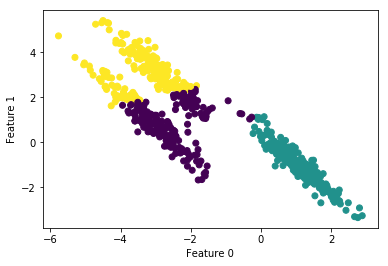

In [20]:
import numpy as np

# Se genera el cluster de datos
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# Se tranforman los datos para hacerlos más stretched"
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# Se agrupan los datos en 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot del cluster generado
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[0, 1, 2], s=10, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Como se observa...no opera muy bien, la separación que hace no parece seguir el agrupamiento natural de los datos, veamos otro caso:

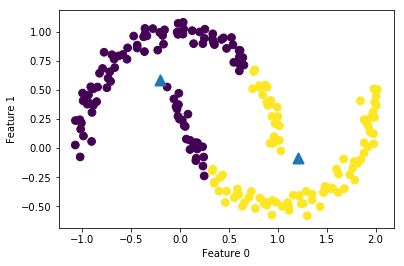

In [21]:
# se generan los datos sinteticos con menos ruido 
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# se agrupan los datos en 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot del cluster generado
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

De la misma forma que en el ejemplo anterior, no parece que kMeans opere correctamente en conjuntos de datos complejos.

# AGLOMERACIÓN

Se procede a llamar al algoritmo, se crean un set de datos y se aplica el aglomeración (***Recuerda el mayor beneficio de usar aglomeración versus kMeans?***):

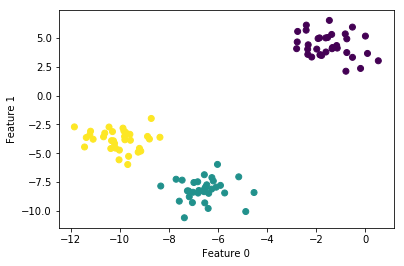

In [27]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Se observa una adecuada separacion de los datos, ahora se introduce el concepto de estimación de numero de cluster (aspecto novedoso que a diferencia de kMeans, incluye ahora el algoritmo de aglomeración). Primero se importa la función de dendrograma y ward (usando **SciPy**), para luego crear un set de datos como se muestra en la figura: 

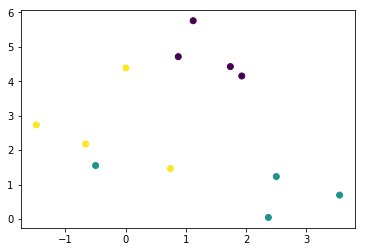

In [23]:
# Se importa la funcion dendrogram y la funcion ward clustering de SciPy

from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
plt.scatter(X[:, 0], X[:, 1], c=y)


Se genera el dendrograma:

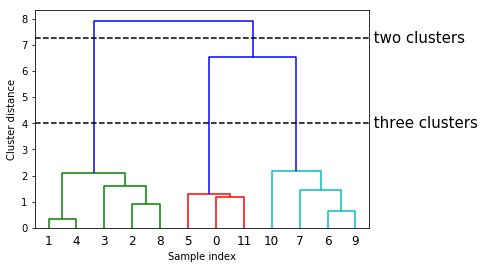

In [24]:
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

Nótese como la mayor distancia se cubre en el espacio que indica (3) clusters.

# DBSCAN

Se llama al algoritmo y se generan los datos de distribución compleja que los pasados algoritmos no lograron agrupar bien:

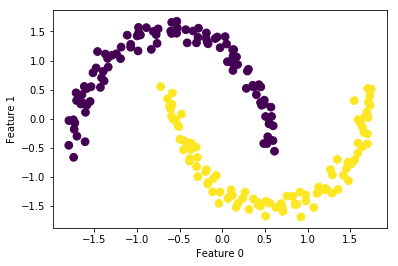

In [25]:
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# DBSCAN
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Nótese como ahora sí se ejecuta correctamente la clasificación.

**Quiere conocer más los métodos anteriores? **

- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Otros métodos: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

- http://scikit-learn.org/stable/modules/clustering.html#k-means

- http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

- http://scikit-learn.org/stable/modules/clustering.html#dbscan